In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor

In [3]:
train=pd.read_csv('D:\pe_train.csv')
test=pd.read_csv('D:\pe_test.csv')  

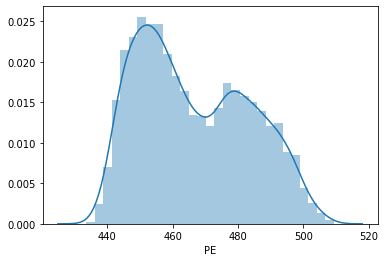

In [3]:
sns.distplot(train['PE'])

In [4]:
sc = StandardScaler()
train1 = train.drop('PE',axis = 1)
trains = sc.fit_transform(train1)
tests = sc.transform(test)
y = train['PE']


In [41]:
### Raw OLS model 
import statsmodels.api as sm
X_constant = sm.add_constant(trains)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 2.964e+04
Date:                Sat, 25 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:09:19   Log-Likelihood:                -28292.
No. Observations:                9568   AIC:                         5.659e+04
Df Residuals:                    9563   BIC:                         5.663e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        466.4740      0.048   9798.631      0.000     466.381     466.567
x1           -14.7064      0.116   -126.580      0.000     -14.934     -14.479
x2            -2.9632      0.094    -31.451      0.000      -3.148      -2.779
x3             0.3341      0.057      5.818      0.000       0.222       0.447
x4            -2.3037      0.062    -37.145      0.000      -2.425      -2.182
==============================================================================
Omnibus:                      412.122   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1204.009
Skew:                          -0.161   Prob(JB):                    3.57e-262
Kurtosis:                       4.708   Cond. No.                         4.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
from sklearn.model_selection import cross_val_score,KFold

In [6]:
from xgboost import XGBRegressor
xgb=XGBRegressor(
 learning_rate =0.01,
 n_estimators=6000,
 max_depth=6,
 colsample_bytree=0.8,
 seed=100)
xgb_model=xgb.fit(trains,y)

KeyboardInterrupt: 

In [43]:

xgb_results= cross_val_score(xgb, trains, y,cv=5, scoring='neg_root_mean_squared_error')

In [44]:
np.mean(xgb_results)

-2.6747999118112613

In [46]:
y_pred1 = xgb_model.predict(tests)

In [48]:
grd = GradientBoostingRegressor(learning_rate =0.01,n_estimators=6500,max_depth=6)
grd_model=grd.fit(trains,y)

In [49]:
gb_results= cross_val_score(grd, trains, y,cv=5, scoring='neg_root_mean_squared_error')

In [51]:
np.mean(gb_results)

-2.643109164713995

In [52]:
y_pred2 = grd_model.predict(tests)

In [7]:
X = train.drop('PE',axis = 1)
y = train['PE']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [9]:
X_trains = sc.fit_transform(X_train)
X_tests = sc.transform(X_test)

In [56]:
from lightgbm import LGBMRegressor
lgb_fit_params={"early_stopping_rounds":100, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_tests,y_test)],
            'eval_names': ['valid'],
            'verbose':100
           }
lgb_params = {'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.01,
 'max_bin': 255,
 'max_depth': 6,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31}

In [58]:

from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators=20000, **lgb_params, random_state=123456789, n_jobs=-1)
lgb.fit(X_trains, y_train, **lgb_fit_params)
lgb.best_iteration_

Training until validation scores don't improve for 100 rounds
[100]	valid's rmse: 7.39079
[200]	valid's rmse: 4.55953
[300]	valid's rmse: 3.91115
[400]	valid's rmse: 3.72033
[500]	valid's rmse: 3.61788
[600]	valid's rmse: 3.54634
[700]	valid's rmse: 3.48541
[800]	valid's rmse: 3.43419
[900]	valid's rmse: 3.39139
[1000]	valid's rmse: 3.3526
[1100]	valid's rmse: 3.31729
[1200]	valid's rmse: 3.28258
[1300]	valid's rmse: 3.24867
[1400]	valid's rmse: 3.21567
[1500]	valid's rmse: 3.18847
[1600]	valid's rmse: 3.16202
[1700]	valid's rmse: 3.13638
[1800]	valid's rmse: 3.1117
[1900]	valid's rmse: 3.09086
[2000]	valid's rmse: 3.07205
[2100]	valid's rmse: 3.05345
[2200]	valid's rmse: 3.03853
[2300]	valid's rmse: 3.02331
[2400]	valid's rmse: 3.00813
[2500]	valid's rmse: 2.99295
[2600]	valid's rmse: 2.97928
[2700]	valid's rmse: 2.96744
[2800]	valid's rmse: 2.95508
[2900]	valid's rmse: 2.9427
[3000]	valid's rmse: 2.93155
[3100]	valid's rmse: 2.92148
[3200]	valid's rmse: 2.91231
[3300]	valid's rmse: 2

9266

In [59]:

clf_lgb=LGBMRegressor(n_estimators=int(lgb.best_iteration_*1.2), **lgb_params)
lgb_model=clf_lgb.fit(trains, y)

In [60]:
lgb_score=cross_val_score(X=trains,y=y,estimator=clf_lgb,scoring='neg_root_mean_squared_error',cv=5)

In [67]:
np.mean(lgb_score)

-2.573120965645183

In [66]:
y_pred3 = lgb_model.predict(tests)

In [73]:
y_pred=(0.15*y_pred1)+(y_pred2*0.15)+(y_pred3*0.7)
y_pred

array([471.60833789, 494.40796252, 496.08309322, ..., 471.64773642,
       444.58452749, 464.82570665])

In [75]:
pe2=pd.DataFrame(np.round(abs(y_pred),4),columns=['PE'])

In [78]:
pe2.to_excel('D:\pe2.xlsx',index=False) 

In [72]:
y_test = pd.read_csv('D:\pe_sample.csv')
y_test.head()

,PE
0,472.459382
1,493.673699
2,496.046368
3,480.007971
4,445.407637


In [79]:
y_pred1=(0.1*y_pred1)+(y_pred2*0.2)+(y_pred3*0.7)
y_pred1

array([471.62713092, 494.37040789, 496.10146354, ..., 471.64508313,
       444.56897406, 464.85053215])

In [80]:
pe3=pd.DataFrame(np.round(abs(y_pred1),2),columns=['PE'])

In [81]:
pe3.to_excel('D:\pe3.xlsx',index=False) 

In [74]:
from sklearn.metrics import mean_squared_error

In [77]:
np.sqrt(mean_squared_error(y_test,pe2))

1.4547131871022625

In [45]:
from mlxtend.regressor import StackingCVRegressor

In [64]:
RANDOM_SEED = 42
clf1 = xgb
clf2 = grd

sclf = StackingCVRegressor(regressors=[clf1, clf2], 
                          meta_regressor=lgb,random_state=RANDOM_SEED)


In [65]:
for clf, label in zip([clf1, clf2, sclf], 
                      ['xgb', 
                       'GradientBoost',
                       'Stacking']):
    

    scores = cross_val_score(clf, trains, y, cv=5, scoring='neg_root_mean_squared_error')
    print("Accuracy: %0.6f (+/- %0.4f) [%s]"  % (scores.mean(), scores.std(), label))

Accuracy: -2.674800 (+/- 0.0717) [xgb]
Accuracy: -2.644430 (+/- 0.0807) [GradientBoost]


KeyboardInterrupt: 

In [10]:
lgb_fit_params={"early_stopping_rounds":200, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_tests,y_test)],
            'eval_names': ['valid'],
            'verbose':100
           }
lgb_params = {'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.01,
 'max_bin': 255,
 'max_depth': 6,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31}

In [11]:

from lightgbm import LGBMRegressor

lgb1 = LGBMRegressor(n_estimators=40000, **lgb_params, random_state=123456789, n_jobs=-1)
lgb1.fit(X_trains, y_train, **lgb_fit_params)
lgb1.best_iteration_

Training until validation scores don't improve for 200 rounds
[100]	valid's rmse: 7.39079
[200]	valid's rmse: 4.55953
[300]	valid's rmse: 3.91115
[400]	valid's rmse: 3.72033
[500]	valid's rmse: 3.61788
[600]	valid's rmse: 3.54634
[700]	valid's rmse: 3.48541
[800]	valid's rmse: 3.43419
[900]	valid's rmse: 3.39139
[1000]	valid's rmse: 3.3526
[1100]	valid's rmse: 3.31729
[1200]	valid's rmse: 3.28258
[1300]	valid's rmse: 3.24867
[1400]	valid's rmse: 3.21567
[1500]	valid's rmse: 3.18847
[1600]	valid's rmse: 3.16202
[1700]	valid's rmse: 3.13638
[1800]	valid's rmse: 3.1117
[1900]	valid's rmse: 3.09086
[2000]	valid's rmse: 3.07205
[2100]	valid's rmse: 3.05345
[2200]	valid's rmse: 3.03853
[2300]	valid's rmse: 3.02331
[2400]	valid's rmse: 3.00813
[2500]	valid's rmse: 2.99295
[2600]	valid's rmse: 2.97928
[2700]	valid's rmse: 2.96744
[2800]	valid's rmse: 2.95508
[2900]	valid's rmse: 2.9427
[3000]	valid's rmse: 2.93155
[3100]	valid's rmse: 2.92148
[3200]	valid's rmse: 2.91231
[3300]	valid's rmse: 2

12011

In [12]:

clf_lgb1=LGBMRegressor(n_estimators=int(lgb1.best_iteration_*1.2), **lgb_params)
lgb1_model=clf_lgb1.fit(trains, y)

In [13]:
lgb_score1=cross_val_score(X=trains,y=y,estimator=clf_lgb1,scoring='neg_root_mean_squared_error',cv=5)

In [14]:
np.mean(lgb_score1)

-2.561670439238864

In [15]:
y_pred4 = lgb1_model.predict(tests)

In [100]:
y_predn = (0.11*y_pred1)+(y_pred2*0.11)+(y_pred4*0.78)
y_predn

array([471.87244833, 494.68762091, 495.72666352, ..., 471.95809432,
       444.54582224, 464.60638529])

In [101]:
pe4=pd.DataFrame(np.round(abs(y_predn),2),columns=['PE'])

In [102]:
pe4.to_excel('D:\pe4.xlsx',index=False) 

In [21]:
from xgboost import XGBRegressor
xgb1=XGBRegressor(
 learning_rate =0.01,
 n_estimators=6000,
 max_depth=10,
 colsample_bytree=0.8,
 seed=100)
xgb_model1=xgb1.fit(trains,y)

In [22]:

xgb_results1= cross_val_score(xgb1, trains, y,cv=5, scoring='neg_root_mean_squared_error')

In [23]:
np.mean(xgb_results1)

-2.5250372908992618

In [24]:
y_pred01 = xgb_model1.predict(tests)

In [25]:
y_pred01

array([472.11115, 494.98642, 497.32034, ..., 472.11334, 444.50436,
       465.81137], dtype=float32)

In [33]:
grd2 = GradientBoostingRegressor(learning_rate =0.01,n_estimators=6500,max_depth=8)
grd_model2=grd2.fit(trains,y)

In [34]:
grd_results2= cross_val_score(grd2, trains, y,cv=5, scoring='neg_root_mean_squared_error')

In [35]:
np.mean(grd_results2)

-2.6162821957456375

In [36]:
y_pred02 = grd_model2.predict(tests)

In [48]:
y_preds = (0.3*y_pred4)+(y_pred01*0.6)+(y_pred02*0.1)
y_preds                     

array([472.07091512, 494.94919306, 496.81860105, ..., 472.07632835,
       444.58136802, 465.305332  ])

In [49]:
pe5=pd.DataFrame(np.round(abs(y_preds),2),columns=['PE'])  #2.214

In [50]:
pe5.to_excel('D:\pe5.xlsx',index=False) 

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:

rf = RandomForestRegressor( n_estimators=300,max_depth = 10,n_jobs = -1)

ada = AdaBoostRegressor(base_estimator = rf,learning_rate = 0.01 ,n_estimators = 100 )


In [ ]:
ada_model=ada.fit(trains,y)

In [ ]:

ada_results= cross_val_score(ada, trains, y,cv=5, scoring='neg_root_mean_squared_error')

In [17]:
from xgboost import XGBRegressor
xgb2=XGBRegressor(
 learning_rate =0.01,
 n_estimators=6500,
 max_depth=10,
 colsample_bytree=0.8,
 seed=100)
xgb_model2=xgb2.fit(trains,y)

In [18]:
xgb_results2= cross_val_score(xgb2, trains, y,cv=5, scoring='neg_root_mean_squared_error')

In [19]:
np.mean(xgb_results2)

-2.5246143752392753

In [20]:
y_pred5 = xgb_model2.predict(tests)

In [37]:
y_predd = (0.2*y_pred4)+(y_pred02*0.1)+(y_pred5*0.7)
y_predd   

array([472.10284485, 494.96175824, 497.01974855, ..., 472.10904725,
       444.56847412, 465.4676866 ])

In [38]:
pe6=pd.DataFrame(np.round(abs(y_predd),2),columns=['PE'])  

In [39]:
pe6.to_excel('D:\pe6.xlsx',index=False) 

In [67]:
from xgboost import XGBRegressor
xgb3=XGBRegressor(
 learning_rate =0.03,
 n_estimators=6500,
 max_depth=10,
 colsample_bytree=0.8,
 seed=100)
xgb_model3=xgb3.fit(trains,y)

In [68]:
xgb_results3= cross_val_score(xgb3, trains, y,cv=5, scoring='neg_root_mean_squared_error')

In [69]:
np.mean(xgb_results3)

-2.532006710183853